# Representación gráfica de las relaciones de dispersión TFG (matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
from typing import List, Tuple
from scipy import constants as const #De aquí puedo obtener las constantes físicas para el w_D
%config InlineBackend.figure_format = 'retina'  # para que se me vean en alta resolución  || tal cual copiado de google no sé que significa

In [29]:
#Parámetros
Ef = 0.63
w_D = 2*Ef*const.alpha
    #Si02
eps_inf_si = 2.1
w_l0_si = 1244*100*const.h*const.c/const.e #en eV
w_t0_si = 105200*const.h*const.c/const.e   #en eV
y_0_si = 0.073*w_l0_si 
    #Al2O3
eps_inf_al = 2.5
w_l0_al = 93600*const.h*const.c/const.e   #en eV
w_t0_al = 77200*const.h*const.c/const.e   #en eV
y_0_al = 0.18*w_l0_al
w_D


0.009194664237318

# Grafeno

## 1. Polaritón plasmónico de grafeno

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c}{\epsilon_1+\epsilon_2} $$

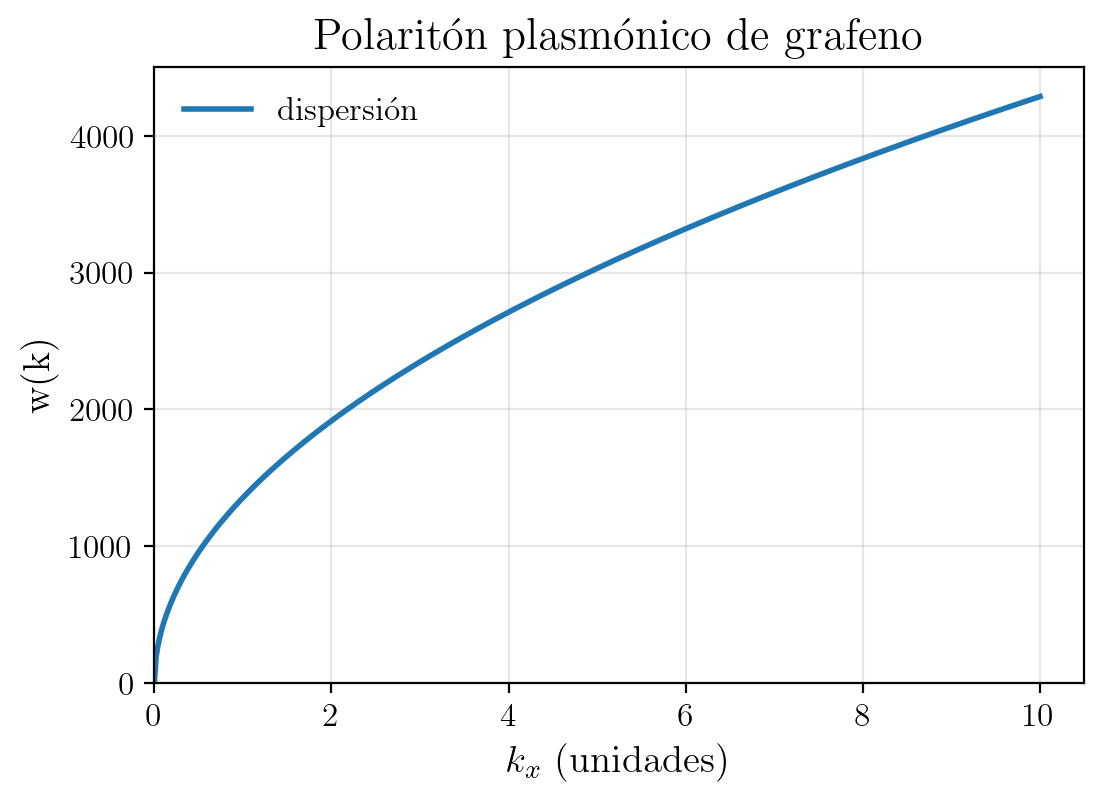

In [3]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritón plasmónico de grafeno") #Título de la gráfica
x = np.linspace(0,10,500)
y = (2*x*const.c*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='dispersión')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Polaritón plasmónico de grafeno: dos monocapas

Relación de dispersión $$w_1^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$ y $$w_2^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot cosh(d\cdot k_x/2)}{\epsilon_1senh(d\cdot k_x/2)+\epsilon_2cosh(d\cdot k_x/2)} $$

Cuando miramos el límite asintótico con $k_x \to \infty$ tenemos que ambas soluciones tenderán a:

$$w_{\infty}^2 = \frac{2\cdot k_x \cdot w_D \cdot c  }{\epsilon_1+\epsilon_2} $$

In [4]:
#Definición de d - parámetro de cuentas
d = 18*1239.84193 #el 18 representa los nanometros

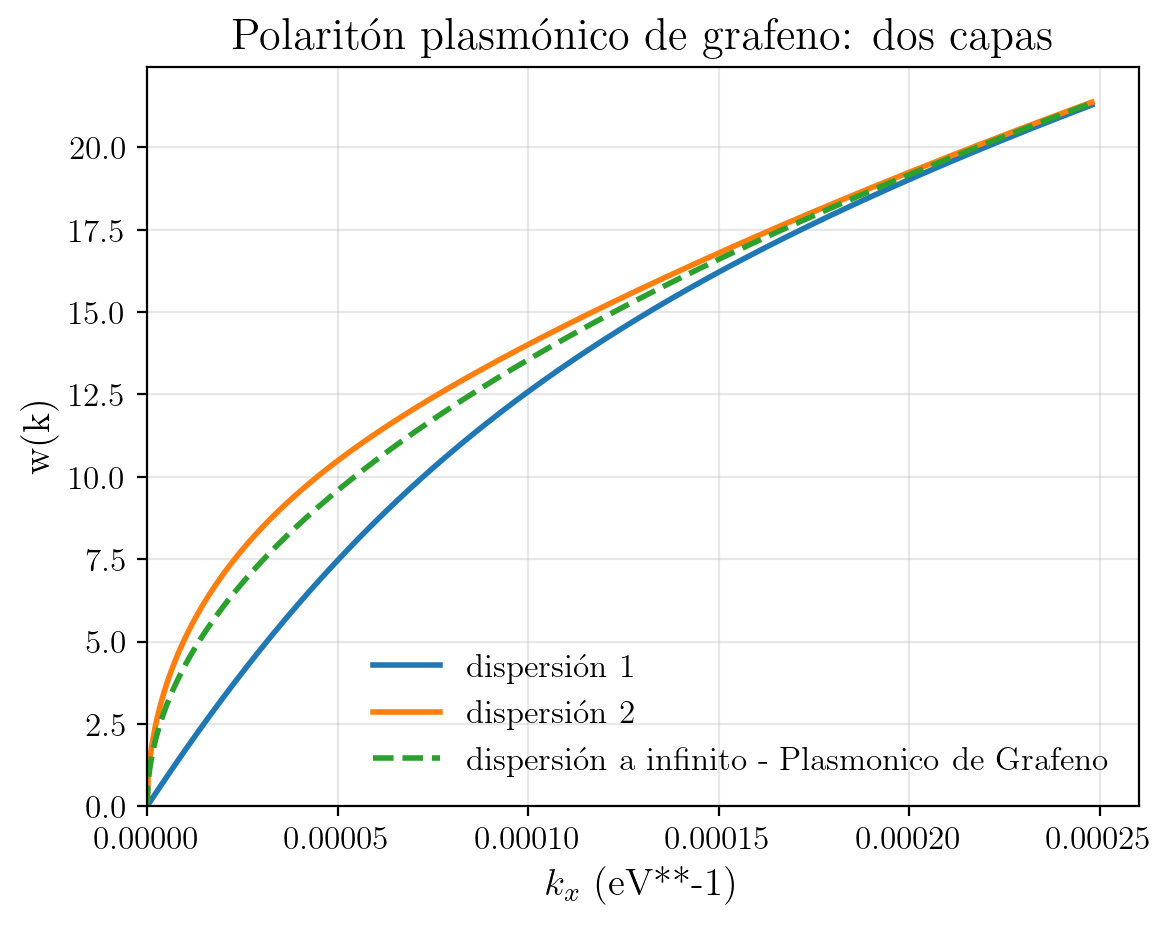

In [75]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno: dos capas") #Título de la gráfica
x = np.linspace(0,2*100*const.h*const.c/const.e,1000)

y_1 = np.sqrt((2*x*const.c*w_D*np.sinh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
y_2 = np.sqrt((2*x*const.c*w_D*np.cosh(x*d/2)/(1*np.sinh(x*d/2)+2*np.cosh(x*d/2)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='dispersión 1')
ax.plot(x,y_2,label='dispersión 2')
y = (2*x*const.c*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='dispersión a infinito - Plasmonico de Grafeno', linestyle = '--')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (eV**-1)")
ax.set_ylabel("w(k)")
ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 3. Polaritón plasmónico de grafeno acústico I

Relación de dispersión $$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c \cdot senh(d\cdot k_x)}{\epsilon_1senh(d\cdot k_x)+\epsilon_2cosh(d\cdot k_x)}$$

Cuando tiende $k_x \to \infty$ nuevamente
$$w^2 = \frac{2\cdot k_x \cdot w_D \cdot c  Polaritón plasmónico de grafeno: dos monocapas}{\epsilon_1+\epsilon_2}$$

In [6]:
#Definición de d - parámetro de cuentas
d = 18*1239.84193 #el 18 representa los nanometros

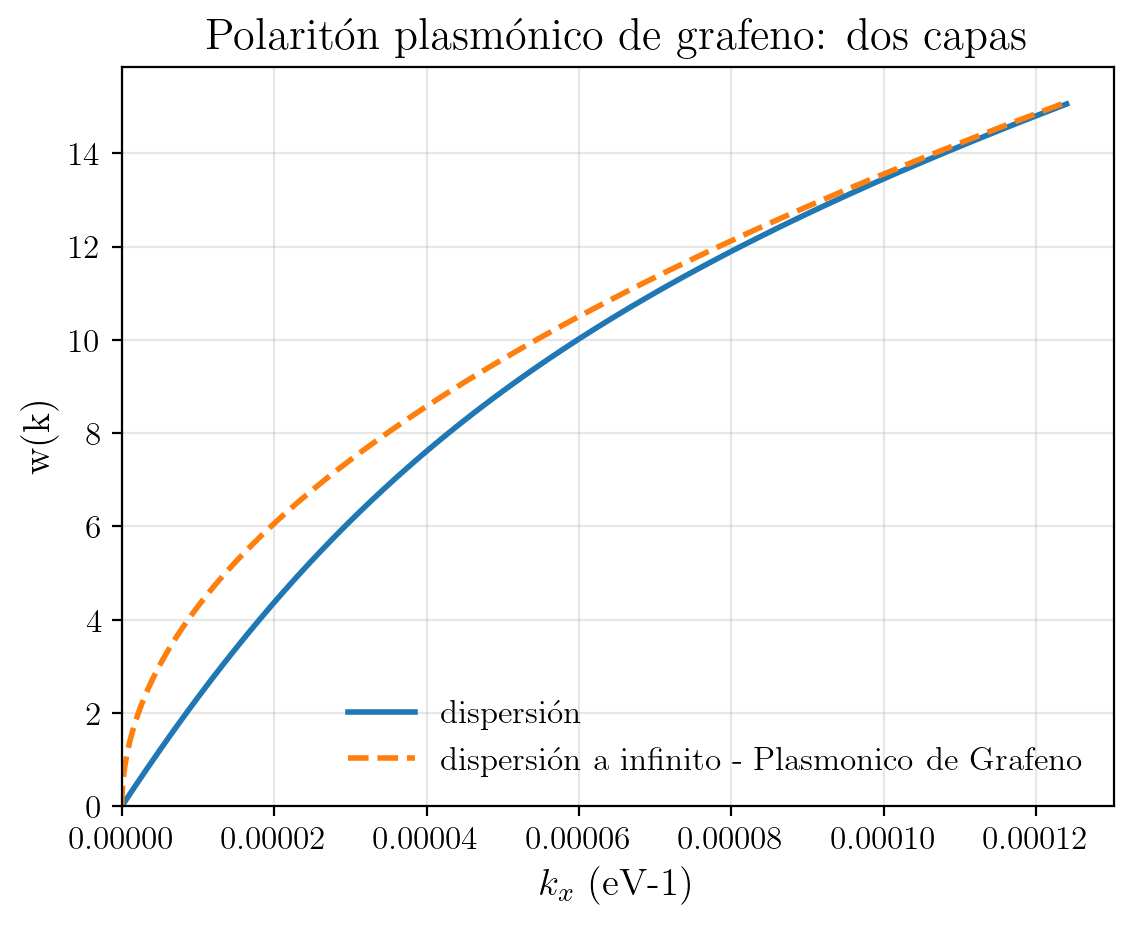

In [81]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico I") #Título de la gráfica
x = np.linspace(0,1*100*const.h*const.c/const.e,3000)
y_1 = np.sqrt((2*x*const.c*w_D*np.sinh(x*d)/(1*np.sinh(x*d)+2*np.cosh(x*d)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='dispersión')
y = (2*x*const.c*w_D/(1+2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y,label='dispersión a infinito - Plasmonico de Grafeno', linestyle = '--')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (eV-1)")
ax.set_ylabel("w(k)")
ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 4. Polaritón plasmónico de grafeno acústico II

Relación de dispersión 

$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) -\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$


$$w^2= \frac{2 c k_x w_D (\epsilon_3 cosh(h_3k_x) senh(h_2k_x)+(2\epsilon_2 cosh(h_2k_x)+\epsilon_1 senh(h_2k_x))senh(h_3k_x)) +\sqrt{2c^2k_x^2w_D^2((-\epsilon_1^2+8\epsilon_2^2+\epsilon_1^2 cosh(2h_2k_x))senh(h_3k_x)^2+2\epsilon_3senh(h_2k_x)^2(\epsilon_3cosh(h_2k_x)^2-\epsilon_1senh(2h_3k_3))}}{2\epsilon_3cosh(h_3k_x)(\epsilon_2cosh(h_2k_x)+\epsilon_1senh(h_2k_x))+2\epsilon_2(\epsilon_1cosh(h_2k_x)+\epsilon_2senh(h_2k_x))senh(h_3k_x)))}$$

Hay algún comportamiento extraño cuando las h_2 $\neq$ h_3. Hay que revisar.

También notar que cuando hamos el límite con d$\to 0$ y $\epsilon_2 \to 1$ obtenemos que una expresión es 0, y la otra es:

$$w^2 = \frac{4ck_xw_D sinh(h_3k_x)}{\epsilon_3cosh(h_3k_x)+\epsilon_1sinh(h_3k_x)}$$

Hay un factor raíz de dos respecto a la relación de dispersión vista en el apartado #3



In [91]:
#Definición de h_2 y h_3 - parámetro de cuentas
h_2 = 20*1239.84193 #el 5 representa los nanometros
h_3 = 20*1239.84193

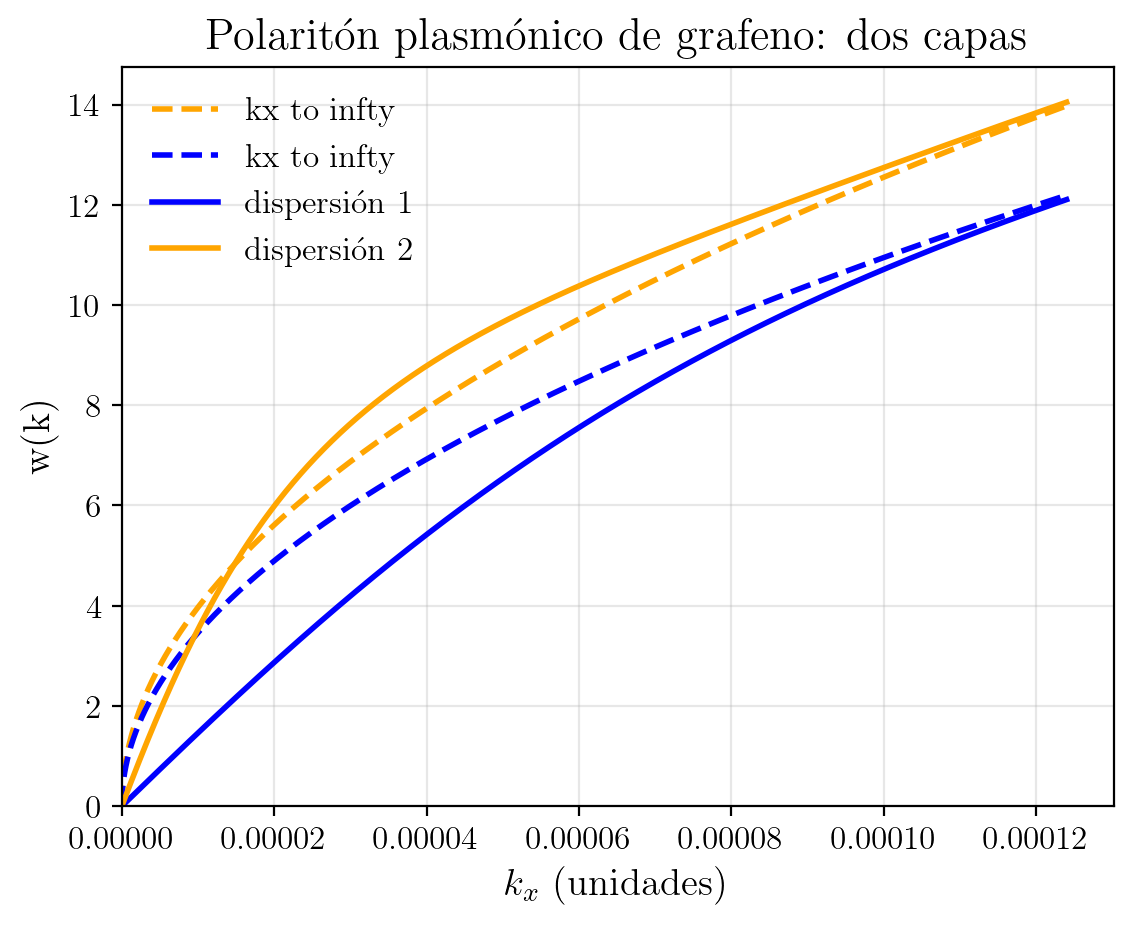

In [110]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = eps_inf_al
epsilon_3 = eps_inf_si


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico II") #Título de la gráfica
x = np.linspace(0,1*100*const.h*const.c/const.e,3000)
yinf1 = (2*x*const.c*w_D/(epsilon_1+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf1,label='kx to infty',linestyle='--',color='orange')
yinf2 = (2*x*const.c*w_D/(epsilon_3+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf2,label='kx to infty',linestyle='--',color='blue')


# Raíz interna
arg_raiz = (
    2 * const.c**2 * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 * const.c * x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='dispersión 1',color='blue')
ax.plot(x,omega2,label='dispersión 2',color='orange')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()


Además, si estamos con que ambos epsilon 2 y 3 son iguales, las dos ramas tenderían a la misma:

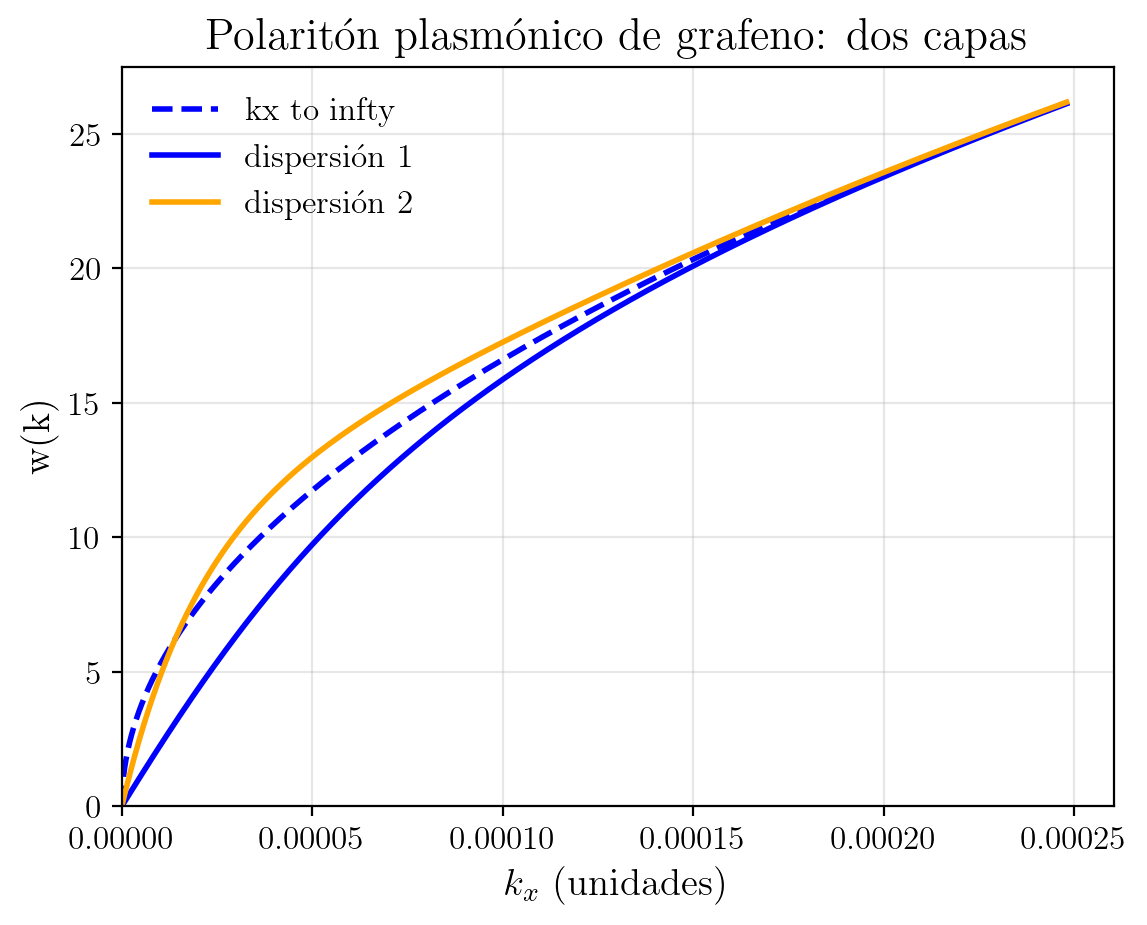

In [114]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = 1
epsilon_3 = 1


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Polaritón plasmónico de grafeno acústico II") #Título de la gráfica
x = np.linspace(0,1*200*const.h*const.c/const.e,3000)
yinf2 = (2*x*const.c*w_D/(epsilon_3+epsilon_2))**(1/2) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,yinf2,label='kx to infty',linestyle='--',color='blue')


# Raíz interna
arg_raiz = (
    2 * const.c**2 * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 * const.c * x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='dispersión 1',color='blue')
ax.plot(x,omega2,label='dispersión 2',color='orange')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()


Vamos a plotear las dos juntas, acústico I y II ya que veremos como una de las ramas tenderá a la otra (ya que a efectos prácticos en el infinito todas tienden a la primera expresión del polaritón plasmónico de grafeno.

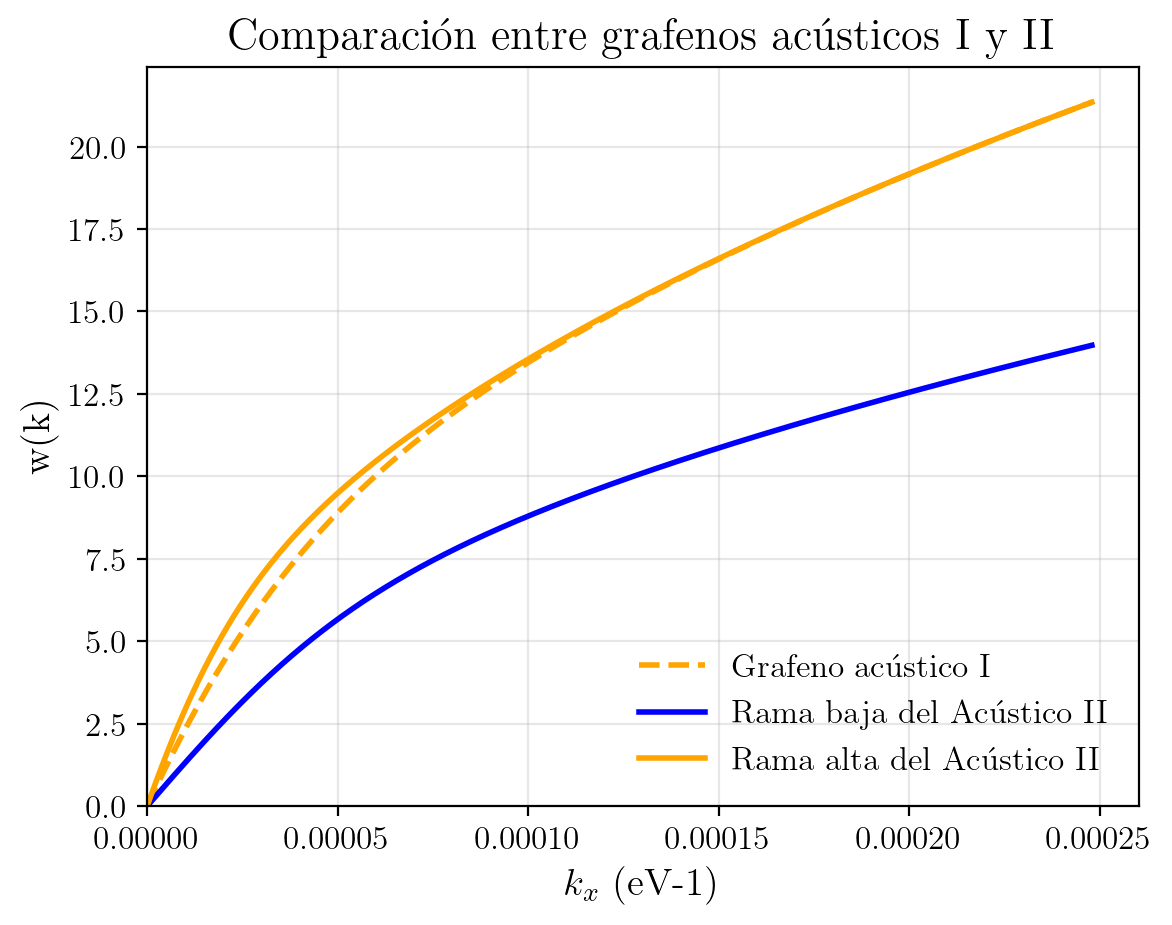

In [127]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})
# Epsilon
epsilon_1 = 1
epsilon_2 = 2
epsilon_3 = 5
# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots()
ax.set_title("Comparación entre grafenos acústicos I y II") #Título de la gráfica
x = np.linspace(0,1*200*const.h*const.c/const.e,3000)
y_1 = np.sqrt((epsilon_2*x*const.c*w_D*np.sinh(x*d)/(1*np.sinh(x*d)+epsilon_2*np.cosh(x*d)))) # --- Suponemos un epsilon1 = aire = 1 y un epsilon2 = 2
ax.plot(x,y_1,label='Grafeno acústico I',color='orange',linestyle='--')

# Raíz interna
arg_raiz = (
    2 * const.c**2 * x**2 * w_D**2 * (
        (-epsilon_1**2 + 8 * epsilon_2**2 + epsilon_1**2 * np.cosh(2 * h_2 * x)) * np.sinh(h_3 * x)**2 +
        2 * epsilon_3 * np.sinh(h_2 * x)**2 * (epsilon_3 * np.cosh(h_2 * x)**2 - epsilon_1 * np.sinh(2 * h_3 * x))
    )
)

# Parte del numerador antes de la raíz
numerador_antes_raiz = (
    2 * const.c * x * w_D * (
        epsilon_3 * np.cosh(h_3 * x) * np.sinh(h_2 * x) +
        (2 * epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
    )
)

# Denominador completo
denominador = (
    2 * epsilon_3 * np.cosh(h_3 * x) * (epsilon_2 * np.cosh(h_2 * x) + epsilon_1 * np.sinh(h_2 * x)) +
    2 * epsilon_2 * (epsilon_1 * np.cosh(h_2 * x) + epsilon_2 * np.sinh(h_2 * x)) * np.sinh(h_3 * x)
)

# omega (frecuencia) con raíz externa
omega1 = np.sqrt((numerador_antes_raiz - np.sqrt(arg_raiz)) / denominador)
omega2 = np.sqrt((numerador_antes_raiz + np.sqrt(arg_raiz)) / denominador)     
ax.plot(x,omega1,label='Rama baja del Acústico II',color='blue')
ax.plot(x,omega2,label='Rama alta del Acústico II',color='orange')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (eV-1)")
ax.set_ylabel("w(k)")
ax.legend(loc="lower right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

# Materiales polares

## 1. Polaritones fonónicos de volumen

Relación de dispersión $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 - \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$ 
 $$w =  \sqrt{ \frac{c^2 k_x^2 + \varepsilon_\infty \omega_L^2 + \sqrt{(c^2 k_x^2 + \varepsilon_\infty \omega_L^2)^2 - 4 c^2 \varepsilon_\infty k_x^2 \omega_T^2}}{2\varepsilon_\infty} }$$

Vamos a representar tanto para el Si como para el Al

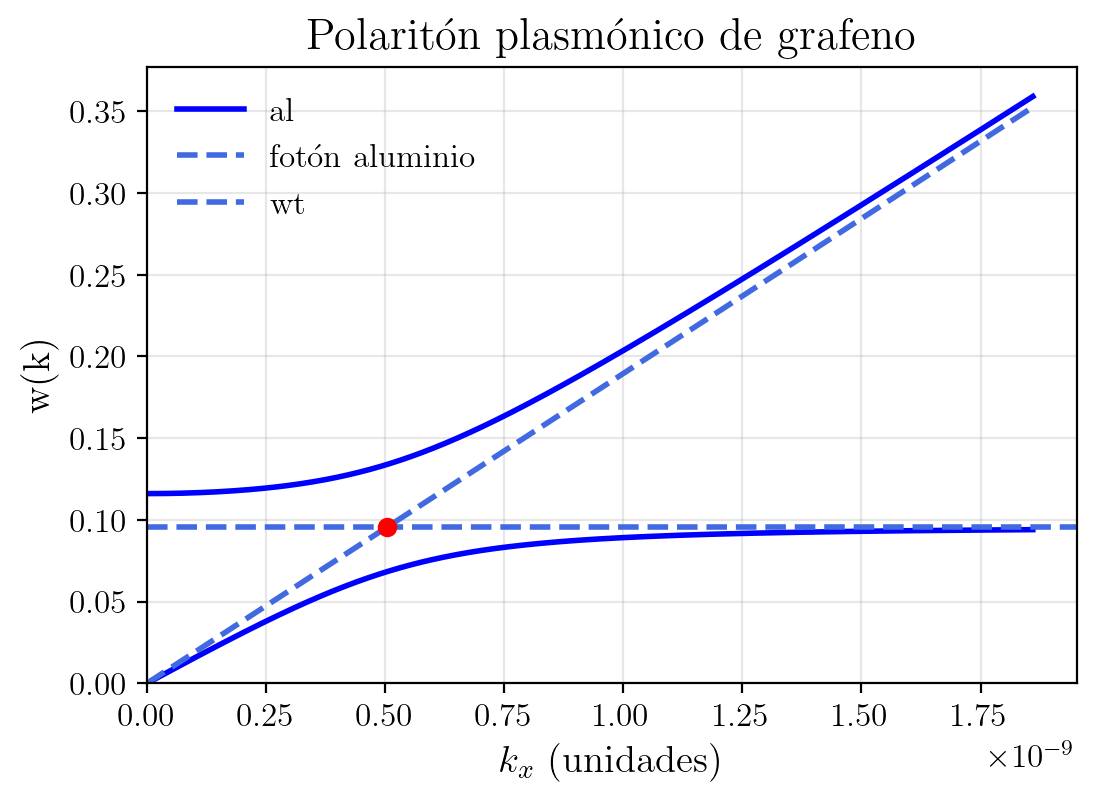

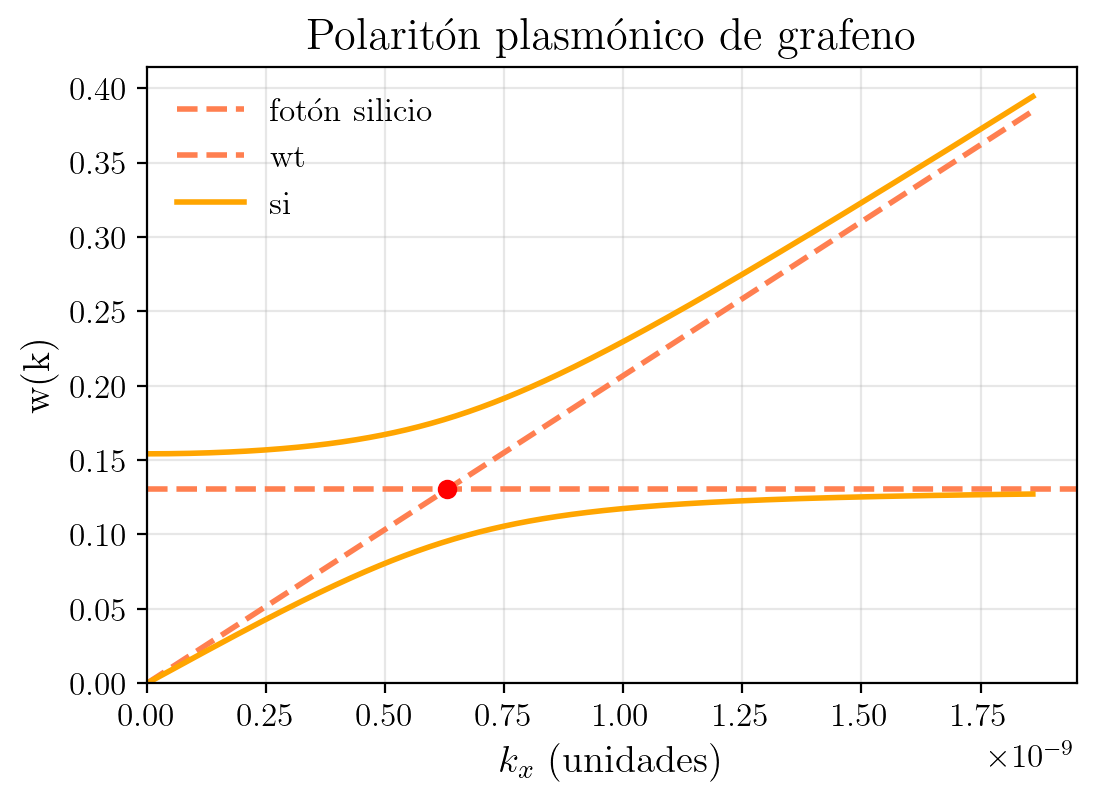

array([169], dtype=int64)

In [10]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen") #Título de la gráfica
x = np.linspace(0,0.000015*100*const.h*const.c/const.e,500)

y1al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2-np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))
y2al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2+np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al))

fal = const.c*x/np.sqrt(eps_inf_al)
gal = w_t0_al
ax.plot(x,y1al,label=' al', color='blue')
ax.plot(x,y2al,color='blue')
ax.plot(x,fal,color='royalblue', linestyle ='--', label='fotón aluminio')
plt.axhline(gal, color='royalblue', linestyle='--', linewidth=2, label='wt')

idx = np.argwhere(np.diff(np.sign(fal - gal))).flatten()
plt.plot(x[idx], fal[idx], 'ro')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)


# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen") #Título de la gráfica
x = np.linspace(0,0.000015*100*const.h*const.c/const.e,500)


y1si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2-np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))
y2si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2+np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si))

fsi = const.c*x/np.sqrt(eps_inf_si)
gsi = w_t0_si
ax.plot(x,fsi,color='coral', linestyle ='--',label='fotón silicio')
plt.axhline(gsi, color='coral', linestyle='--', linewidth=2, label='wt')
ax.plot(x,y1si,label=' si', color='orange')
ax.plot(x,y2si,color='orange')

idx = np.argwhere(np.diff(np.sign(fsi - gsi))).flatten()
plt.plot(x[idx], fsi[idx], 'ro')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper left", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)


plt.show()
idx

Ahora vamos a mostrar la diferencia entre $w_+ - w_-$ para pder ver el mínimo y compararlo con el gap del cruce evitado. Para el valor del mínimo gap del cruce evitado es la intersección entre el valor dado por $w_t$ y la línea de fonones, que para este caso vendrá dada por la ecuación $\varepsilon_{\infty}w^2=c^2k_x^2 \longrightarrow k_{min}=\sqrt{\varepsilon_{\infty}}w_t/c$

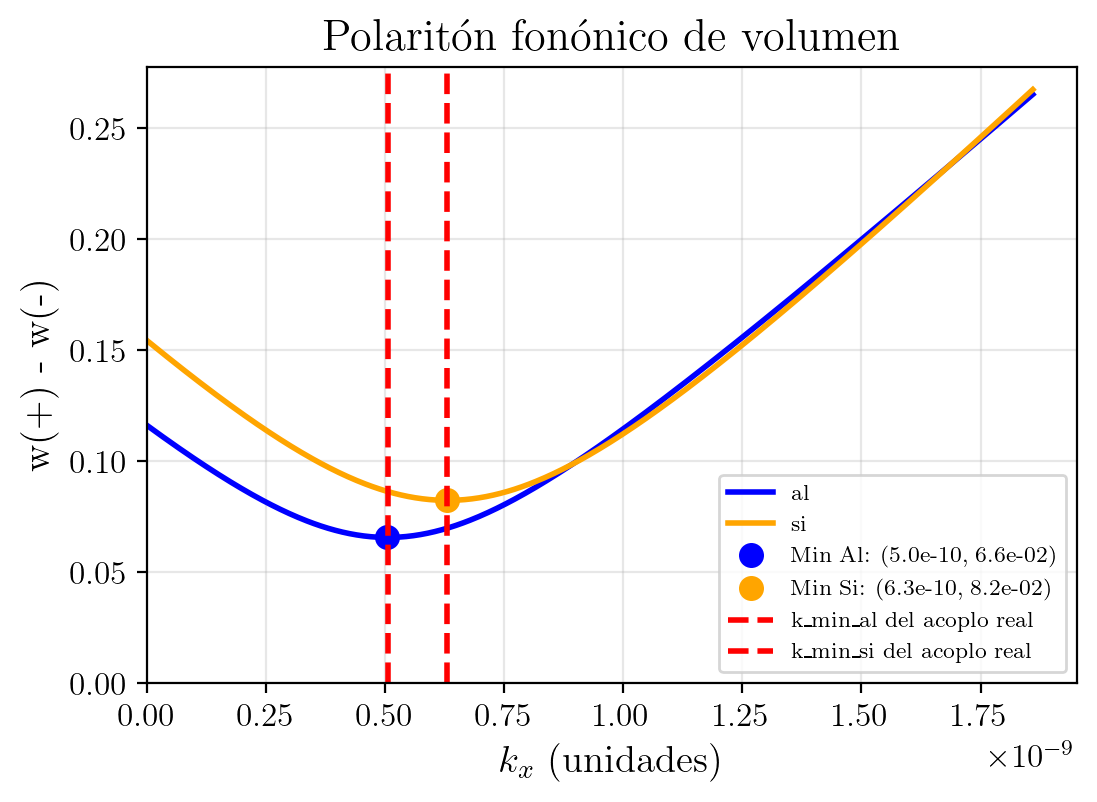

In [11]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Polaritones fonónicos de volumen") #Título de la gráfica
x = np.linspace(0,0.000015*100*const.h*const.c/const.e,500)

y1al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2-np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al)) #omega-
y2al = np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2+np.sqrt((const.c**2*x**2+eps_inf_al*w_l0_al**2)**2-4*const.c**2*eps_inf_al*x**2*w_t0_al**2))/(2*eps_inf_al)) #omega+
y1si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2-np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si)) #omega-
y2si = np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2+np.sqrt((const.c**2*x**2+eps_inf_si*w_l0_si**2)**2-4*const.c**2*eps_inf_si*x**2*w_t0_si**2))/(2*eps_inf_si)) #omega+

# Cálculo de las funciones finales
y_al = y2al - y1al
y_si = y2si - y1si

ax.plot(x,y_al,label=' al', color='blue')
ax.plot(x,y_si,label=' si', color='orange')

# --- BÚSQUEDA DE MÍNIMOS ---
idx_min_al = np.argmin(y_al)
x_min_al = x[idx_min_al]
y_min_al = y_al[idx_min_al]

idx_min_si = np.argmin(y_si)
x_min_si = x[idx_min_si]
y_min_si = y_si[idx_min_si]
# Marcar los mínimos en la gráfica
ax.plot(x_min_al, y_min_al,'o', markersize=8, 
        label=f'Min Al: ({x_min_al:.1e}, {y_min_al:.1e})',color='blue')
ax.plot(x_min_si, y_min_si, 'o', markersize=8, 
        label=f'Min Si: ({x_min_si:.1e}, {y_min_si:.1e})',color='orange')
plt.axvline(np.sqrt(eps_inf_al)*w_t0_al/const.c, color='r', linestyle='--', linewidth=2, label='k_min_al del acoplo real')
plt.axvline(np.sqrt(eps_inf_si)*w_t0_si/const.c, color='r', linestyle='--', linewidth=2, label='k_min_si del acoplo real')


# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(+) - w(-)")
ax.legend(loc="lower right", frameon=True, fontsize=8)

# --- Límites y anotaciones ---
ax.set_xlim(0,)
ax.set_ylim(0,)
plt.show()

## 2. Fonones superficiales

Relación de dispersión

$$w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
w = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$

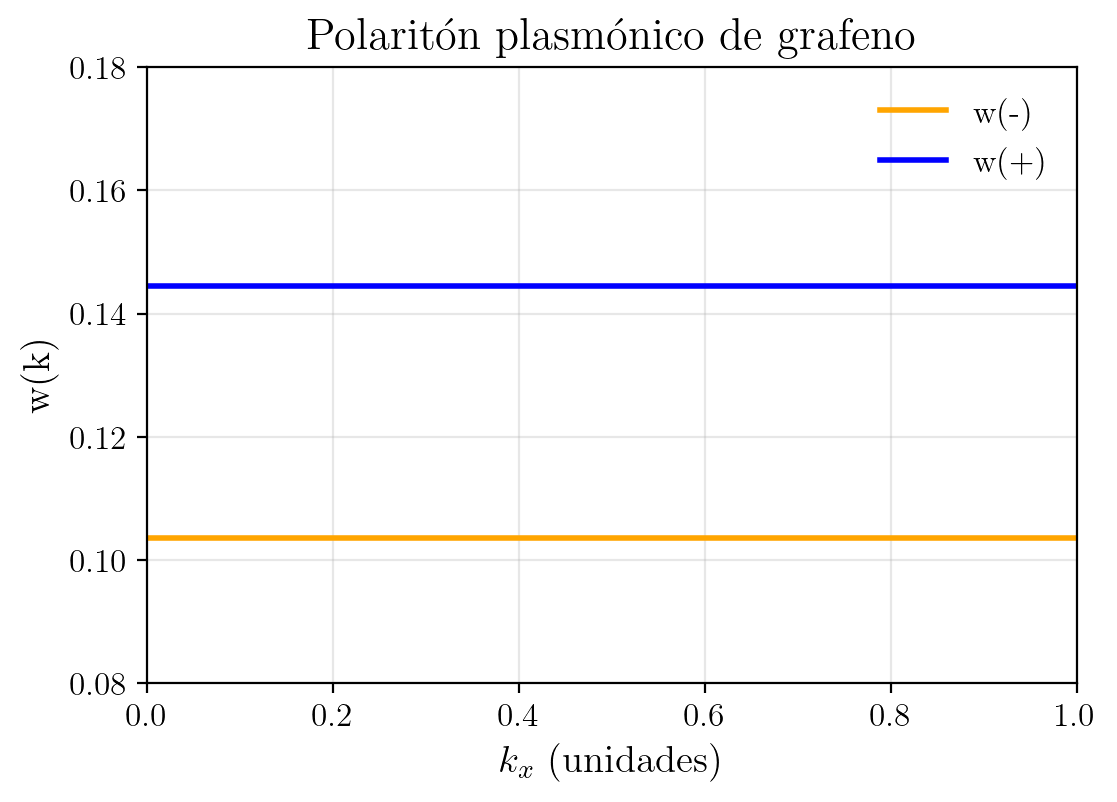

In [12]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Fonones superficiales") #Título de la gráfica
x = np.linspace(0,0.000000002,500)

y2 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        + np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)
y1 = np.sqrt(
    (
        eps_inf_si * (w_l0_si**2 + w_t0_al**2)
        + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
        - np.sqrt(
            -4 * (eps_inf_al + eps_inf_si)
            * (eps_inf_si * w_l0_si**2 * w_t0_al**2 + eps_inf_al * w_l0_al**2 * w_t0_si**2)
            + (
                eps_inf_si * (w_l0_si**2 + w_t0_al**2)
                + eps_inf_al * (w_l0_al**2 + w_t0_si**2)
            )**2
        )
    )
    / (2 * (eps_inf_al + eps_inf_si))
)




plt.axhline(y1,color='orange', label='w(-)')
plt.axhline(y2,color='blue', label='w(+)')




# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (unidades)")
ax.set_ylabel("w(k)")
ax.legend(loc="best", frameon=False)

# --- Límites y anotaciones ---
ax.set_ylim(0.08,0.18)

plt.show()


## 3. Lámina de material polar de espesor d

Relación de dispersión

$$w^2=\frac{\varepsilon_{\infty}w_l^2cosh(k_xh)+\varepsilon_1*w_t^2senh(k_xh)}{\varepsilon_{\infty}cosh(k_xh)+\varepsilon_1senh(k_xh)}$$

Cuando d tiende a infinito vamos a tener que:

$$w^2=\frac{\varepsilon_{\infty}w_l^2+\varepsilon_1*w_t^2}{\varepsilon_{\infty}+\varepsilon_1}$$

In [13]:
#Definición de parámetro altura
h=5*1239.84193 #el 5 representa los nanometros

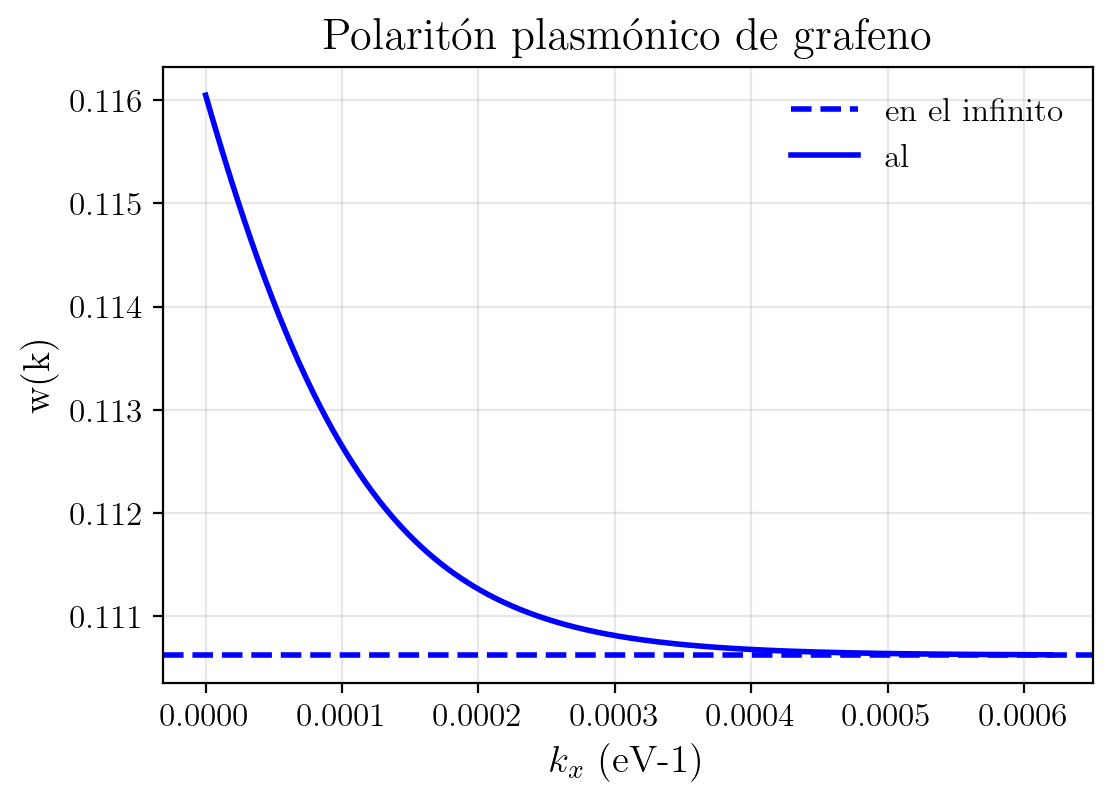

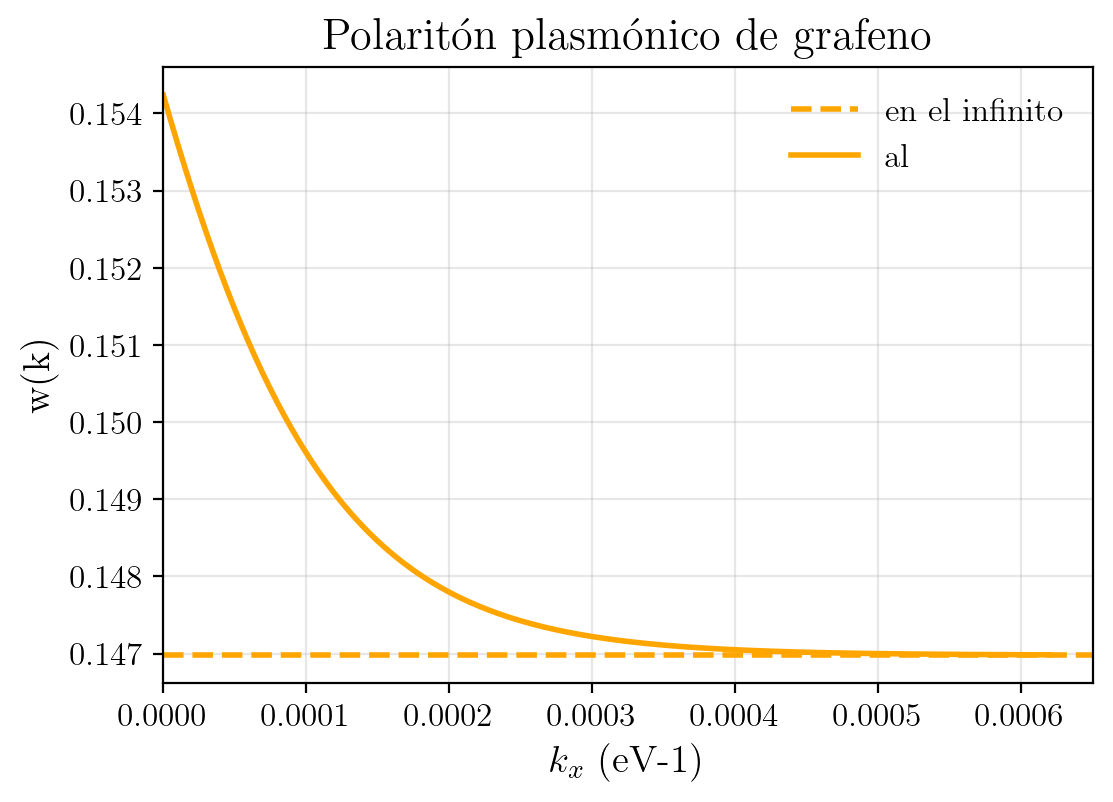

In [14]:
plt.rcParams.update({ # --- Parámetros (copiado de internet para cambiar lo de Latex) ---
    "text.usetex": True,  #Para tipografía de Latex
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.alpha": 0.3
})

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d") #Título de la gráfica
x = np.linspace(0,5*100*const.h*const.c/const.e,500)

yal= np.sqrt((eps_inf_al*w_l0_al**2*np.cosh(x*h)+1*w_t0_al**2*np.sinh(x*h))/(eps_inf_al*np.cosh(x*h)+1*np.sinh(x*h)))
infinitoal= np.sqrt((eps_inf_al*w_l0_al**2+1*w_t0_al**2)/(eps_inf_al+1))
plt.axhline(infinitoal,color='blue', linestyle ='--', label='en el infinito')

ax.plot(x,yal,label=' al', color='blue')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (eV-1)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper right", frameon=False)
plt.show()
# --- Límites y anotaciones ---
ax.set_xlim(0,)

# --- Creación de los datos: manipular esto para cada ejemplo, el resto no tocar ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Lámina de material polar de espesor d") #Título de la gráfica
x = np.linspace(0,5*100*const.h*const.c/const.e,500)


ysi= np.sqrt((eps_inf_si*w_l0_si**2*np.cosh(x*h)+1*w_t0_si**2*np.sinh(x*h))/(eps_inf_si*np.cosh(x*h)+1*np.sinh(x*h)))
infinitosi= np.sqrt((eps_inf_si*w_l0_si**2+1*w_t0_si**2)/(eps_inf_si+1))
plt.axhline(infinitosi,color='orange', linestyle ='--', label='en el infinito')
ax.plot(x,ysi,label=' al', color='orange')

# --- Etiquetas, título y leyenda ---

ax.set_xlabel(r"$k_x$ (eV-1)")
ax.set_ylabel("w(k)")
ax.legend(loc="upper right", frameon=False)

# --- Límites y anotaciones ---
ax.set_xlim(0,)

plt.show()

## 4. Hibridación de polaritones fonónicos superficiales I


**Lámina polar (2) de espesor \(d\) sobre sustrato polar (3), con $ \varepsilon_1$.**  
Definimos $u\equiv \omega^2$ (es bicúbica)

### Ecuación general en $u=\omega^2$
$$
\tanh(d\,k_x)\Big[
\varepsilon_{1}\varepsilon_{\infty 3}\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)^2
+\varepsilon_{\infty 2}^{\,2}\,(\omega_{L2}^2-u)^2\,(\omega_{T3}^2-u)
\Big]
+\varepsilon_{\infty 2}\varepsilon_{\infty 3}\,(\omega_{L2}^2-u)\,(\omega_{L3}^2-u)\,(\omega_{T2}^2-u)
+\varepsilon_{1}\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)\,(\omega_{T3}^2-u)\,(\omega_{T2}^2-u)=0.
$$

Para resolverlo debemos de hacer uso un método numérico, siendo la ecuación:

$$
0.0000206569 Cosh[d kx] + u^3 (-7.75 Cosh[d kx] - 8.35 Sinh[d kx]) + 
  u (-0.0047448 Cosh[d kx] - 0.00508909 Sinh[d kx]) + 
  u^2 (0.342797 Cosh[d kx] + 0.363105 Sinh[d kx]) + 
  0.0000234777 Sinh[d kx] = 0
$$

Las soluciones las vamos a representar junto a sus límites asintóticos:



---

### 1) Límite $k_x\to 0$
Como $\tanh(d\,k_x)\to 0$, queda
$$
\varepsilon_{\infty 2}\,(\omega_{L2}^2-u)(\omega_{T2}^2-u)\,
\Big[\varepsilon_{\infty 3}(\omega_{L3}^2-u)+\varepsilon_{1}(\omega_{T3}^2-u)\Big]=0.
$$

De aquí:
$$
u_{10}=\omega_{L2}^2,\qquad
u_{20}=\omega_{T2}^2,
$$
y la raíz de interfaz $(3|1)$:
$$
u_{30}=\omega^2=\frac{\varepsilon_{\infty 3}\,\omega_{L3}^2+\varepsilon_{1}\,\omega_{T3}^2}
{\varepsilon_{\infty 3}+\varepsilon_{1}}.
$$

---

### 2) Límite asintótico $k_x\to\infty$
Como $\tanh(d\,k_x)\to 1$, resulta una cúbica en $u$. Una solución analítica toma la forma del modo superficial del medio 2 con el externo $\varepsilon_1$:
$$
u_{1inf}=\omega^2=\frac{\varepsilon_{\infty 2}\,\omega_{L2}^2+\varepsilon_{1}\,\omega_{T2}^2}
{\varepsilon_{\infty 2}+\varepsilon_{1}}.
$$

Las otras dos raíces coinciden con las frecuencias de fonones superficiales de los medios polares semiinfinitos, cuya relación de dispersión es:
$$
u_{2inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) - \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$
$$
u_{3inf} = \frac{ \varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2) + \sqrt{ -4 (\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) (\varepsilon_{\infty 2} \omega_{L2}^2 \omega_{T1}^2 + \varepsilon_{\infty 1} \omega_{L1}^2 \omega_{T2}^2) + (\varepsilon_{\infty 2} (\omega_{L2}^2 + \omega_{T1}^2) + \varepsilon_{\infty 1} (\omega_{L1}^2 + \omega_{T2}^2))^2 } \big)}{2(\varepsilon_{\infty 1} + \varepsilon_{\infty 2}) }
$$


In [128]:


import numpy as np
import matplotlib.pyplot as plt


# === Preferencias de render: evitar errores con LaTeX externo/Unicode ===
plt.rcParams.update({
    "text.usetex": False,           # usar mathtext interno
    "axes.unicode_minus": False,    # guiones seguros
})

# === Constantes y tolerancias ===
HC_EV_NM = 1239.84193  # (hc) en eV·nm — convierte h [nm] -> d [eV]
REAL_TOL = 1e-8        # tolerancia para parte imaginaria ~ 0
_DEF_EPS = 1e-12       # tolerancia para comparar con 0 (clip numérico)

# -------------------------------------------------------------------------------------
# Utilidades numéricas
# -------------------------------------------------------------------------------------

def _real_nonneg_roots(z: np.ndarray, tol: float = REAL_TOL) -> np.ndarray:
    """Filtra raíces con |Im|<tol y parte real >= -_DEF_EPS."""
    z = np.asarray(z)
    mask = np.abs(np.imag(z)) < tol
    ur = np.real(z[mask])
    return ur[ur >= -_DEF_EPS]


def _track_branches(y_sets: List[np.ndarray], max_branches: int = 3) -> List[np.ndarray]:
    """Asigna hasta 'max_branches' curvas por continuidad (greedy) a lo largo de kx.
    y_sets[j] contiene las ω reales (ordenadas) en el j‑ésimo kx.
    Devuelve listas de longitud num_pts con NaNs donde falta rama.
    """
    num_pts = len(y_sets)
    branches = [np.full(num_pts, np.nan) for _ in range(max_branches)]

    # Inicializa con las raíces del primer punto (j=0)
    y0 = y_sets[0]
    for i in range(min(max_branches, y0.size)):
        branches[i][0] = y0[i]

    # Recorre kx y enlaza por cercanía al valor previo
    for j in range(1, num_pts):
        avail = list(y_sets[j])  # raíces disponibles en este kx
        # 1) continúa ramas existentes eligiendo la raíz más cercana al valor previo
        for b in range(max_branches):
            prev = branches[b][j-1]
            if np.isfinite(prev) and avail:
                idx = int(np.argmin([abs(v - prev) for v in avail]))
                branches[b][j] = avail.pop(idx)
        # 2) abre nuevas ramas si sobran raíces sin asignar
        for b in range(max_branches):
            if not avail:
                break
            if not np.isfinite(branches[b][j]):
                branches[b][j] = avail.pop(0)
    return branches


# -------------------------------------------------------------------------------------
# Solver de la cúbica y límites (t=0 y t=1)
# -------------------------------------------------------------------------------------

def _coeffs_from_t(t: np.ndarray | float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Coeficientes de la cúbica en u para un escalar o vector t = tanh(d*kx).
    Ecuación (tras dividir por cosh): a3 u^3 + a2 u^2 + a1 u + a0 = 0.
    """
    a3 = -7.75     - 8.35     * t
    a2 =  0.342797 + 0.363105 * t
    a1 = -0.0047448- 0.00508909* t
    a0 =  0.0000206569 + 0.0000234777 * t
    return a3, a2, a1, a0


def _omega_sets_over_kx(d_eV: float, kx: np.ndarray) -> List[np.ndarray]:
    """Resuelve la cúbica para cada kx, filtra u>=0 reales y devuelve ω ordenadas."""
    t = np.tanh(d_eV * kx)
    a3, a2, a1, a0 = _coeffs_from_t(t)
    coeffs = np.vstack([a3, a2, a1, a0]).T  # (num_pts,4)

    omega_sets: List[np.ndarray] = []
    for c in coeffs:
        u_roots = np.roots(c)
        ur = _real_nonneg_roots(u_roots)
        if ur.size:
            w = np.sqrt(np.clip(ur, 0.0, None))
            w.sort()
        else:
            w = np.array([])
        omega_sets.append(w)
    return omega_sets


def _limit_omegas(d_eV: float) -> Tuple[np.ndarray, np.ndarray]:
    """Devuelve (omegas_0, omegas_inf) a partir de la cúbica evaluada en t=0 y t=1.
    Se filtran ω reales con u>=0. Se ordenan de menor a mayor.
    """
    # kx -> 0  =>  t = tanh(d*kx) -> 0
    a3, a2, a1, a0 = _coeffs_from_t(0.0)
    u0 = np.roots([a3, a2, a1, a0])
    u0r = _real_nonneg_roots(u0)
    w0 = np.sqrt(np.clip(np.sort(u0r), 0.0, None))

    # kx -> inf  =>  t = 1
    a3i, a2i, a1i, a0i = _coeffs_from_t(1.0)
    ui = np.roots([a3i, a2i, a1i, a0i])
    uir = _real_nonneg_roots(ui)
    winf = np.sqrt(np.clip(np.sort(uir), 0.0, None))
    return w0, winf


# -------------------------------------------------------------------------------------
# Trazado
# -------------------------------------------------------------------------------------

def _plot(kx: np.ndarray, d_eV: float, branches: List[np.ndarray], show_asymptotes: bool = True):
    """Dibuja ramas ω(kx). Si show_asymptotes=True, añade: líneas horizontales ω_inf (k→∞)
    y marcadores en kx=0 con ω_0. La leyenda incluye el valor numérico de cada ω.
    """
    plt.figure(figsize=(7.6, 4.8), dpi=120)

    # 1) Ramas numéricas
    labels = [r"Rama 1 ($\omega>0$)", r"Rama 2 ($\omega>0$)", r"Rama 3 ($\omega>0$)"]
    any_data = False
    for i, br in enumerate(branches):
        if np.isfinite(br).any():
            any_data = True
            plt.plot(kx, br, lw=2, label=labels[i])

    # 2) Asintóticas y cortes en kx=0 con valores numéricos en la leyenda
    if show_asymptotes:
        w0, winf = _limit_omegas(d_eV)
        x0 = kx[0]
        # — líneas horizontales ω_inf (si existen)
        for idx, w in enumerate(winf):
            y = float(w)
            # Usamos % para evitar conflictos de llaves en f-strings con mathtext
            lbl = r"$\omega_{\infty,%d}=%.6g$" % (idx+1, y)
            plt.axhline(y=y, ls='--', lw=1.6, alpha=0.65, label=lbl)
        # — marcadores en kx=0 para ω_0 (si existen)
        for idx, w in enumerate(w0):
            y = float(w)
            lbl = r"$\omega_{0,%d}=%.6g$" % (idx+1, y)
            plt.plot([x0], [y], marker='o', ms=6, mfc='white', mec='k', label=lbl)

    # 3) Decoración
    plt.title(r"Hibridación de polaritones fonónicos superficiales I")
    plt.xlabel(r"$k_x$  [eV$^{-1}$]")
    plt.ylabel(r"$\omega = \sqrt{u}$  [unid. de $\sqrt{u}$]")
    plt.grid(True, alpha=0.3)

    # Ajuste de límites con margen
    if any_data:
        ydata = np.hstack([br[np.isfinite(br)] for br in branches if np.isfinite(br).any()])
        # Incluye asintóticas/cortes si están activados
        if show_asymptotes:
            w0, winf = _limit_omegas(d_eV)
            yextra = np.hstack([w0, winf]) if (w0.size + winf.size) else np.array([])
            if yextra.size:
                ydata = np.hstack([ydata, yextra])
        ymin, ymax = float(np.nanmin(ydata)), float(np.nanmax(ydata))
        ypad = 0.10 * (ymax - ymin if ymax > ymin else 1.0)
        xpad = 0.02 * (kx[-1] - kx[0])
        plt.xlim(kx[0] - xpad, kx[-1] + xpad)
        plt.ylim(ymin - ypad, ymax + ypad)

    plt.legend(loc="upper right", frameon=True, ncol=1)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------------------
# Interfaz
# -------------------------------------------------------------------------------------

def _solve_omega_vs_kx(h_nm: float, kx_max: float, num_pts: int) -> Tuple[np.ndarray, float, List[np.ndarray]]:
    """Resuelve la cúbica en todo el dominio kx y devuelve (kx, d_eV, ramas ω)."""
    d_eV = h_nm * HC_EV_NM                                # d en eV
    kx = np.linspace(0.0, kx_max, int(num_pts))           # eje X en eV^{-1}
    omega_sets = _omega_sets_over_kx(d_eV, kx)
    branches = _track_branches(omega_sets, max_branches=3)
    return kx, d_eV, branches


def plot_dispersion(h_nm=5.0, kx_max=1e-3, num_pts=600, asintoticas=True):
    """Función invocada por los sliders.
    h_nm   : espesor en nanómetros (d = h_nm * 1239.84193 eV)
    kx_max : límite superior del eje X en eV^{-1}
    num_pts: puntos de muestreo en kx
    asintoticas: si True, dibuja ω_inf (kx→∞) y ω_0 (kx=0)
    """
    kx, d_eV, branches = _solve_omega_vs_kx(float(h_nm), float(kx_max), int(num_pts))
    _plot(kx, d_eV, branches, show_asymptotes=bool(asintoticas))

# Sliders/controles
_inter = interact(
    plot_dispersion,
    h_nm=FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1, description='h [nm]'),
    kx_max=FloatSlider(value=1e-3, min=1e-7, max=1e-3, step=1e-7, readout_format='.1e', description='kx_max [eV^{-1}]'),
    num_pts=IntSlider(value=600, min=200, max=2000, step=50, description='puntos'),
    asintoticas=Checkbox(value=True, description='asintóticas y cortes')
)






interactive(children=(FloatSlider(value=5.0, description='h [nm]', max=50.0, min=0.1), FloatSlider(value=0.001…